In [ ]:
#downloading another version of torchvision to solve the downlodin issue of MNIST dataset
!pip3 install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [6]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## for printing image
import numpy as np 
import matplotlib.pyplot as plt

import torch

In [7]:
print(torch.__version__)

1.8.0+cu101


In [8]:
#solve the issue of downloading MNIST dataset
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

## Import torchvision package to download MNIST dataset

In [ ]:
### Run this cell

import torchvision
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./MNIST_data' , download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


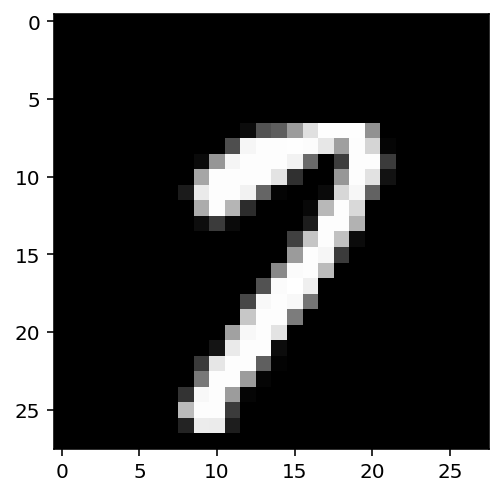

In [11]:
plt.imshow(images[63].numpy().squeeze(), cmap='Greys_r');

# Build a neural network like previous lesson without using the PyTorch nn module


In [ ]:
## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2


# create a softmax activation function for compute the output as a probability distribution over the 10 classes (digits)

In [ ]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Using a PyTorch nn module to build networks with 784 inputs, 256 hidden units, 10 output units and a softmax output 'the same one as above'

In [12]:
from torch import nn

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [ ]:
#Create the network object and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [13]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [14]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

# Your Turn to Build a Network (a fully-connected layer)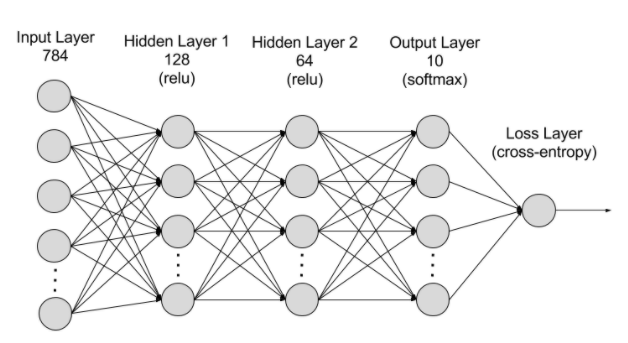

In [16]:
##Solution

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [17]:
model.fc1

Linear(in_features=784, out_features=128, bias=True)

In [18]:
model.fc2

Linear(in_features=128, out_features=64, bias=True)

In [19]:
model.fc3

Linear(in_features=64, out_features=10, bias=True)

In [ ]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0200, -0.0156,  0.0299,  ..., -0.0052,  0.0247,  0.0286],
        [-0.0265,  0.0112,  0.0098,  ..., -0.0166,  0.0183,  0.0200],
        [-0.0271,  0.0267,  0.0220,  ..., -0.0050, -0.0304, -0.0040],
        ...,
        [-0.0258,  0.0216,  0.0071,  ...,  0.0004,  0.0284, -0.0135],
        [-0.0188,  0.0135, -0.0277,  ...,  0.0050,  0.0251, -0.0310],
        [ 0.0002, -0.0209, -0.0235,  ...,  0.0285,  0.0255, -0.0067]],
       requires_grad=True)
Parameter containing:
tensor([-5.6904e-03,  2.4745e-02, -5.3590e-03,  4.8807e-03, -2.6803e-02,
         2.6373e-02, -1.9408e-02, -1.1972e-02,  1.1374e-02,  6.1753e-03,
         2.0263e-02, -2.3219e-02,  2.4835e-04,  2.5261e-02,  1.8106e-02,
        -3.1562e-02,  2.7008e-02, -1.1418e-02,  2.3526e-02,  3.2736e-02,
         2.0467e-02,  1.2627e-03, -2.7554e-02, -3.2887e-02, -8.9781e-03,
        -1.1398e-02, -3.5431e-02, -1.6823e-02, -3.1045e-02,  8.9191e-03,
        -1.4235e-02, -1.8227e-02,  9.5317e-03, -3.6405e-0

# Custom initialization for the weights and biases tensors attached to each layer

In [ ]:
#Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0117, -0.0270,  0.0120,  ...,  0.0099, -0.0184, -0.0069],
        [ 0.0126, -0.0073,  0.0041,  ...,  0.0058, -0.0010, -0.0157],
        [-0.0017, -0.0051,  0.0043,  ..., -0.0053,  0.0069,  0.0126],
        ...,
        [ 0.0004, -0.0019, -0.0073,  ...,  0.0106, -0.0183,  0.0054],
        [-0.0130, -0.0015,  0.0025,  ...,  0.0019, -0.0042, -0.0061],
        [ 0.0101, -0.0071,  0.0030,  ...,  0.0039, -0.0071, -0.0027]])

In [ ]:
#download the custom helper.py file to be able to desplay and view the image in the script below
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

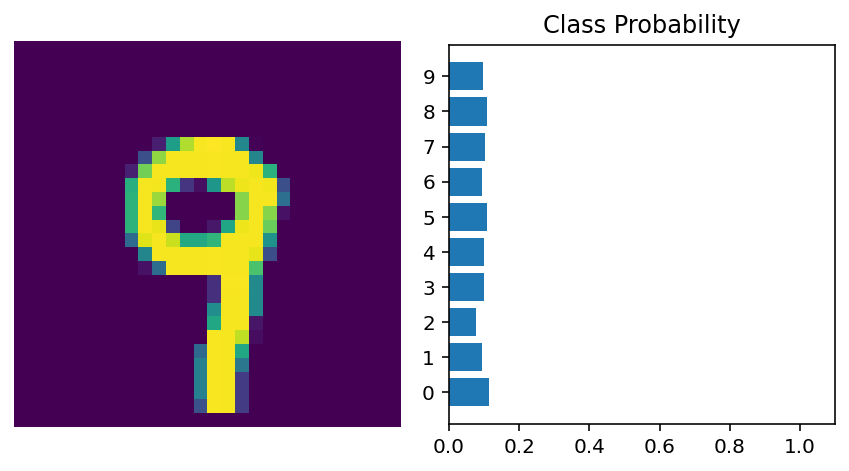

In [ ]:
import helper

# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx] 

helper.view_classify(img.view(1, 28, 28), ps)

# Using nn.Sequential

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


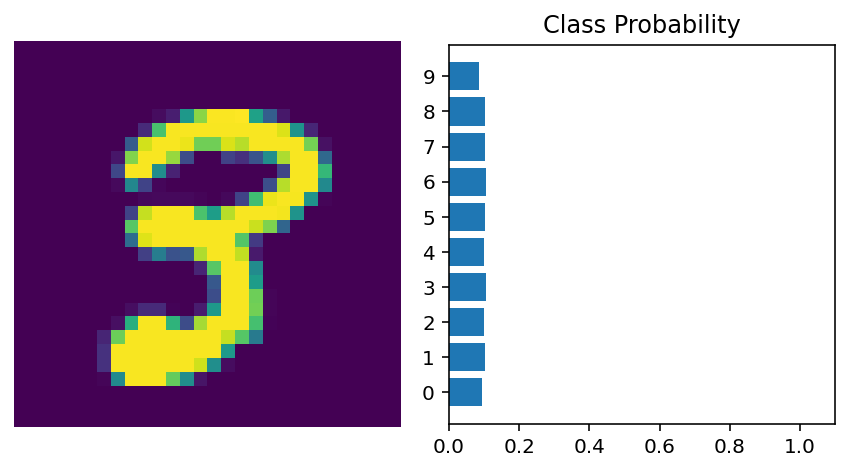

In [ ]:
#Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

# Access a particular layer and weight attached to it

In [ ]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0174, -0.0355,  0.0321,  ..., -0.0259, -0.0152,  0.0193],
        [-0.0055,  0.0157,  0.0209,  ..., -0.0108,  0.0255, -0.0019],
        [ 0.0221, -0.0334,  0.0260,  ..., -0.0059, -0.0308,  0.0207],
        ...,
        [-0.0056,  0.0280, -0.0086,  ...,  0.0175,  0.0088, -0.0290],
        [ 0.0150,  0.0093,  0.0036,  ...,  0.0118,  0.0102, -0.0115],
        [ 0.0079, -0.0304, -0.0293,  ...,  0.0123,  0.0321,  0.0328]],
       requires_grad=True)

# Using an OrderedDict to name the individual layers and operations, instead of using incremental integers

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
